In [1]:
import json
from datasets import load_dataset

ds = load_dataset("BAAI/TACO", split="train", trust_remote_code=True)

print(ds)

/Users/royhuang/anaconda3/envs/rllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['question', 'solutions', 'starter_code', 'input_output', 'difficulty', 'raw_tags', 'name', 'source', 'tags', 'skill_types', 'url', 'Expected Auxiliary Space', 'time_limit', 'date', 'picture_num', 'memory_limit', 'Expected Time Complexity'],
    num_rows: 25443
})


In [2]:
# TACO dataset has difficulties as strings: EASY, MEDIUM, MEDIUM_HARD, HARD, VERY_HARD
# Let EASY->1.9, MEDIUM->3.7, MEDIUM_HARD->5.5, HARD->7.3, VERY_HARD->9.1
def difficulty_to_int(difficulty):
    if difficulty == "EASY":
        return 1.9
    elif difficulty == "MEDIUM":
        return 3.7
    elif difficulty == "MEDIUM_HARD":
        return 5.5
    elif difficulty == "HARD":
        return 7.3
    elif difficulty == "VERY_HARD":
        return 9.1
    else:
        return 0

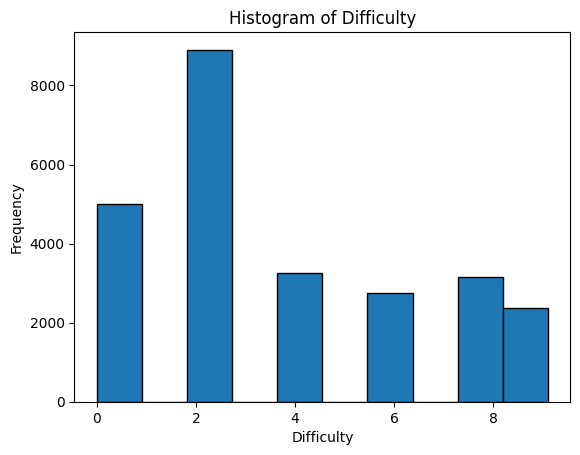

In [4]:
import matplotlib.pyplot as plt

# Extract the difficulty values
difficulties = [difficulty_to_int(entry['difficulty']) for entry in ds]

# Plot the histogram
plt.hist(difficulties, bins=10, edgecolor='black')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.title('Histogram of Difficulty')
plt.show()

In [5]:
dataset = []
for entry in ds:        
    new_entry = {
        "problem": entry["question"],
        "solutions": entry["solutions"],
        "starter_code": entry["starter_code"],
        "difficulty": entry["difficulty"],
        "Expected Time Complexity": entry["Expected Time Complexity"],
        "Expected Auxiliary Space": entry["Expected Auxiliary Space"],
        "input_output": entry["input_output"],# str, #str, when use it to test the model response, need use json.load()
        "time_limit": entry["time_limit"],
        "memory_limit": entry["memory_limit"],
        "url": entry["url"],
        "difficulty": difficulty_to_int(entry["difficulty"]),
    }
    if difficulty_to_int(entry["difficulty"]) > 2:
        dataset.append(new_entry)

print(len(dataset))
print(dataset[0])

with open("train_taco.json", "w") as f:
    json.dump(dataset, f, indent=4)

11525
{'problem': 'This is an interactive problem.\n\nIn good old times dwarves tried to develop extrasensory abilities:\n\n  * Exactly n dwarves entered completely dark cave. \n  * Each dwarf received a hat — white or black. While in cave, none of the dwarves was able to see either his own hat or hats of other Dwarves. \n  * Dwarves went out of the cave to the meadow and sat at an arbitrary place one after the other. When a dwarf leaves the cave, he sees the colors of all hats of all dwarves that are seating on the meadow (i.e. left the cave before him). However, he is not able to see the color of his own hat and none of the dwarves can give him this information. \n  * The task for dwarves was to got diverged into two parts — one with dwarves with white hats and one with black hats. \n\n\n\nAfter many centuries, dwarves finally managed to select the right place on the meadow without error. Will you be able to repeat their success?\n\nYou are asked to successively name n different inte

In [6]:
ds = load_dataset("BAAI/TACO", split="test", trust_remote_code=True)

print(ds)

Dataset({
    features: ['question', 'solutions', 'starter_code', 'input_output', 'difficulty', 'raw_tags', 'name', 'source', 'tags', 'skill_types', 'url', 'Expected Auxiliary Space', 'time_limit', 'date', 'picture_num', 'memory_limit', 'Expected Time Complexity'],
    num_rows: 1000
})


In [7]:
dataset = []
for entry in ds:
    new_entry = {
        "problem": entry["question"],
        "solutions": entry["solutions"],
        "starter_code": entry["starter_code"],
        "difficulty": entry["difficulty"],
        "Expected Time Complexity": entry["Expected Time Complexity"],
        "Expected Auxiliary Space": entry["Expected Auxiliary Space"],
        "input_output": entry["input_output"], #str, when use it to test the model response, need use json.load()
        "time_limit": entry["time_limit"],
        "memory_limit": entry["memory_limit"],
        "url": entry["url"],
        "difficulty": difficulty_to_int(entry["difficulty"]),
    }
    dataset.append(new_entry)

print(len(dataset))
print(dataset[0])

with open("test_taco.json", "w") as f:
    json.dump(dataset, f, indent=4)

1000
{'problem': 'The city park of IT City contains n east to west paths and n north to south paths. Each east to west path crosses each north to south path, so there are n^2 intersections.\n\nThe city funded purchase of five benches. To make it seems that there are many benches it was decided to place them on as many paths as possible. Obviously this requirement is satisfied by the following scheme: each bench is placed on a cross of paths and each path contains not more than one bench.\n\nHelp the park administration count the number of ways to place the benches.\n\n\n-----Input-----\n\nThe only line of the input contains one integer n (5 ≤ n ≤ 100) — the number of east to west paths and north to south paths.\n\n\n-----Output-----\n\nOutput one integer — the number of ways to place the benches.\n\n\n-----Examples-----\nInput\n5\n\nOutput\n120', 'solutions': '["n = int(input())\\ncn5 = n * (n - 1) // 2 * (n - 2) // 3 * (n - 3) // 4 * (n - 4) // 5\\nan5 = n * (n - 1) * (n - 2) * (n - 3